<a href="https://colab.research.google.com/github/nishantkapps/aiml-projects/blob/main/Unsupervised_Learning_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Great Learning / Deakin (MDS) Project Submission : Part A**
>**Unsupervised Learning Project : Part A**<br>
>*Goal : Demonstrate the ability to cluster and segregate data using Unsupervised Learning*<br>
>*Domain : Automobile Industry* <br>
>*Developer : Nishant Killedar*
<hr>

> **CONTEXT**: The data concerns city-cycle fuel consumption in miles per gallon to be predicted in terms of 3 multivalued discrete and 5 continuous attributes<br>
> **PROJECT OBJECTIVE**: To understand K-means Clustering by applying on the Car Dataset to segment the cars into various categories.

<hr>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from scipy.stats import zscore
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import silhouette_score

<hr>

**Section 1 : Data Understanding & Exploration: [5 Marks]**
<li>A. Read ‘Car name.csv’ as a DataFrame and assign it to a variable. [1 Mark]
<li>B. Read ‘Car-Attributes.json as a DataFrame and assign it to a variable. [1 Mark]
<li>C. Merge both the DataFrames together to form a single DataFrame [2 Mark]
<li>D. Print 5 point summary of the numerical features and share insights. [1 Marks]

<hr>

In [2]:
cars = pd.read_csv('/content/drive/MyDrive/datasets/usl/Car name.csv')
attrib = pd.read_json('/content/drive/MyDrive/datasets/usl/Car-Attributes.json')

In [3]:
print('Car Names: ', cars.shape)
print('Car Attributes: ', attrib.shape)

Car Names:  (398, 1)
Car Attributes:  (398, 8)


In [4]:
data = cars.join(attrib)

In [5]:
print('Merged DataFrame: ', data.shape)

Merged DataFrame:  (398, 9)


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   car_name  398 non-null    object 
 1   mpg       398 non-null    float64
 2   cyl       398 non-null    int64  
 3   disp      398 non-null    float64
 4   hp        398 non-null    object 
 5   wt        398 non-null    int64  
 6   acc       398 non-null    float64
 7   yr        398 non-null    int64  
 8   origin    398 non-null    int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cyl,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
disp,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
wt,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acc,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
yr,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
origin,398.0,1.572864,0.802055,1.0,1.000,1.0,2.000,3.0


>**Insights**
><li> All features do not have significant outliers. Calculated using 1.5 * IQR (which shows all of them should have close to a normal distribution)
><li> "mpg" has a large range (variance) which is expected given that we have large range (variance) for "car weight" and "displacement"
><li> "year" feature is represented as 2 digit numbers from 70 - 82 (1970 - 1982)
><li> "origin" feature looks like a categorical value ( 1, 2, 3 ) - have to check if this is ordinal as well

<hr>

**Section 2 : Data Preparation & Analysis: [10 Marks]**
<li>A. Check and print feature-wise percentage of missing values present in the data and impute with the best suitable approach. [2 Mark]
<li>B. Check for duplicate values in the data and impute with the best suitable approach. [1 Mark]
<li>C. Plot a pairplot for all features. [1 Marks]
<li>D. Visualize a scatterplot for ‘wt’ and ‘disp’. Datapoints should be distinguishable by ‘cyl’. [1 Marks]
<li>E. Share insights for Q2.d. [1 Marks]
<li>F. Visualize a scatterplot for ‘wt’ and ’mpg’. Datapoints should be distinguishable by ‘cyl’. [1 Marks]
<li>G. Share insights for Q2.f. [1 Marks]
<li>H. Check for unexpected values in all the features and datapoints with such values. [2 Marks]<br>
&emsp;&emsp;[Hint: ‘?’ is present in ‘hp’]

<hr>

In [8]:
# replace any blank or ' ' or ? values with NaN
data = data.replace(r'^\s*$', np.nan, regex=True)

In [9]:
# check for missing values
print((data.isnull().sum()/data.shape[0])*100,'%')

car_name    0.0
mpg         0.0
cyl         0.0
disp        0.0
hp          0.0
wt          0.0
acc         0.0
yr          0.0
origin      0.0
dtype: float64 %


<hr>
<li> Data has no null values, so no imputation is required
<li> Will check for unexpected values below
<hr>

In [10]:
if not data.duplicated().any() :
  print('There are no duplicate rows in the data frame')

There are no duplicate rows in the data frame


<hr>
<li> Data has no duplicate values or rows, so no imputation/deletion is required
<hr>

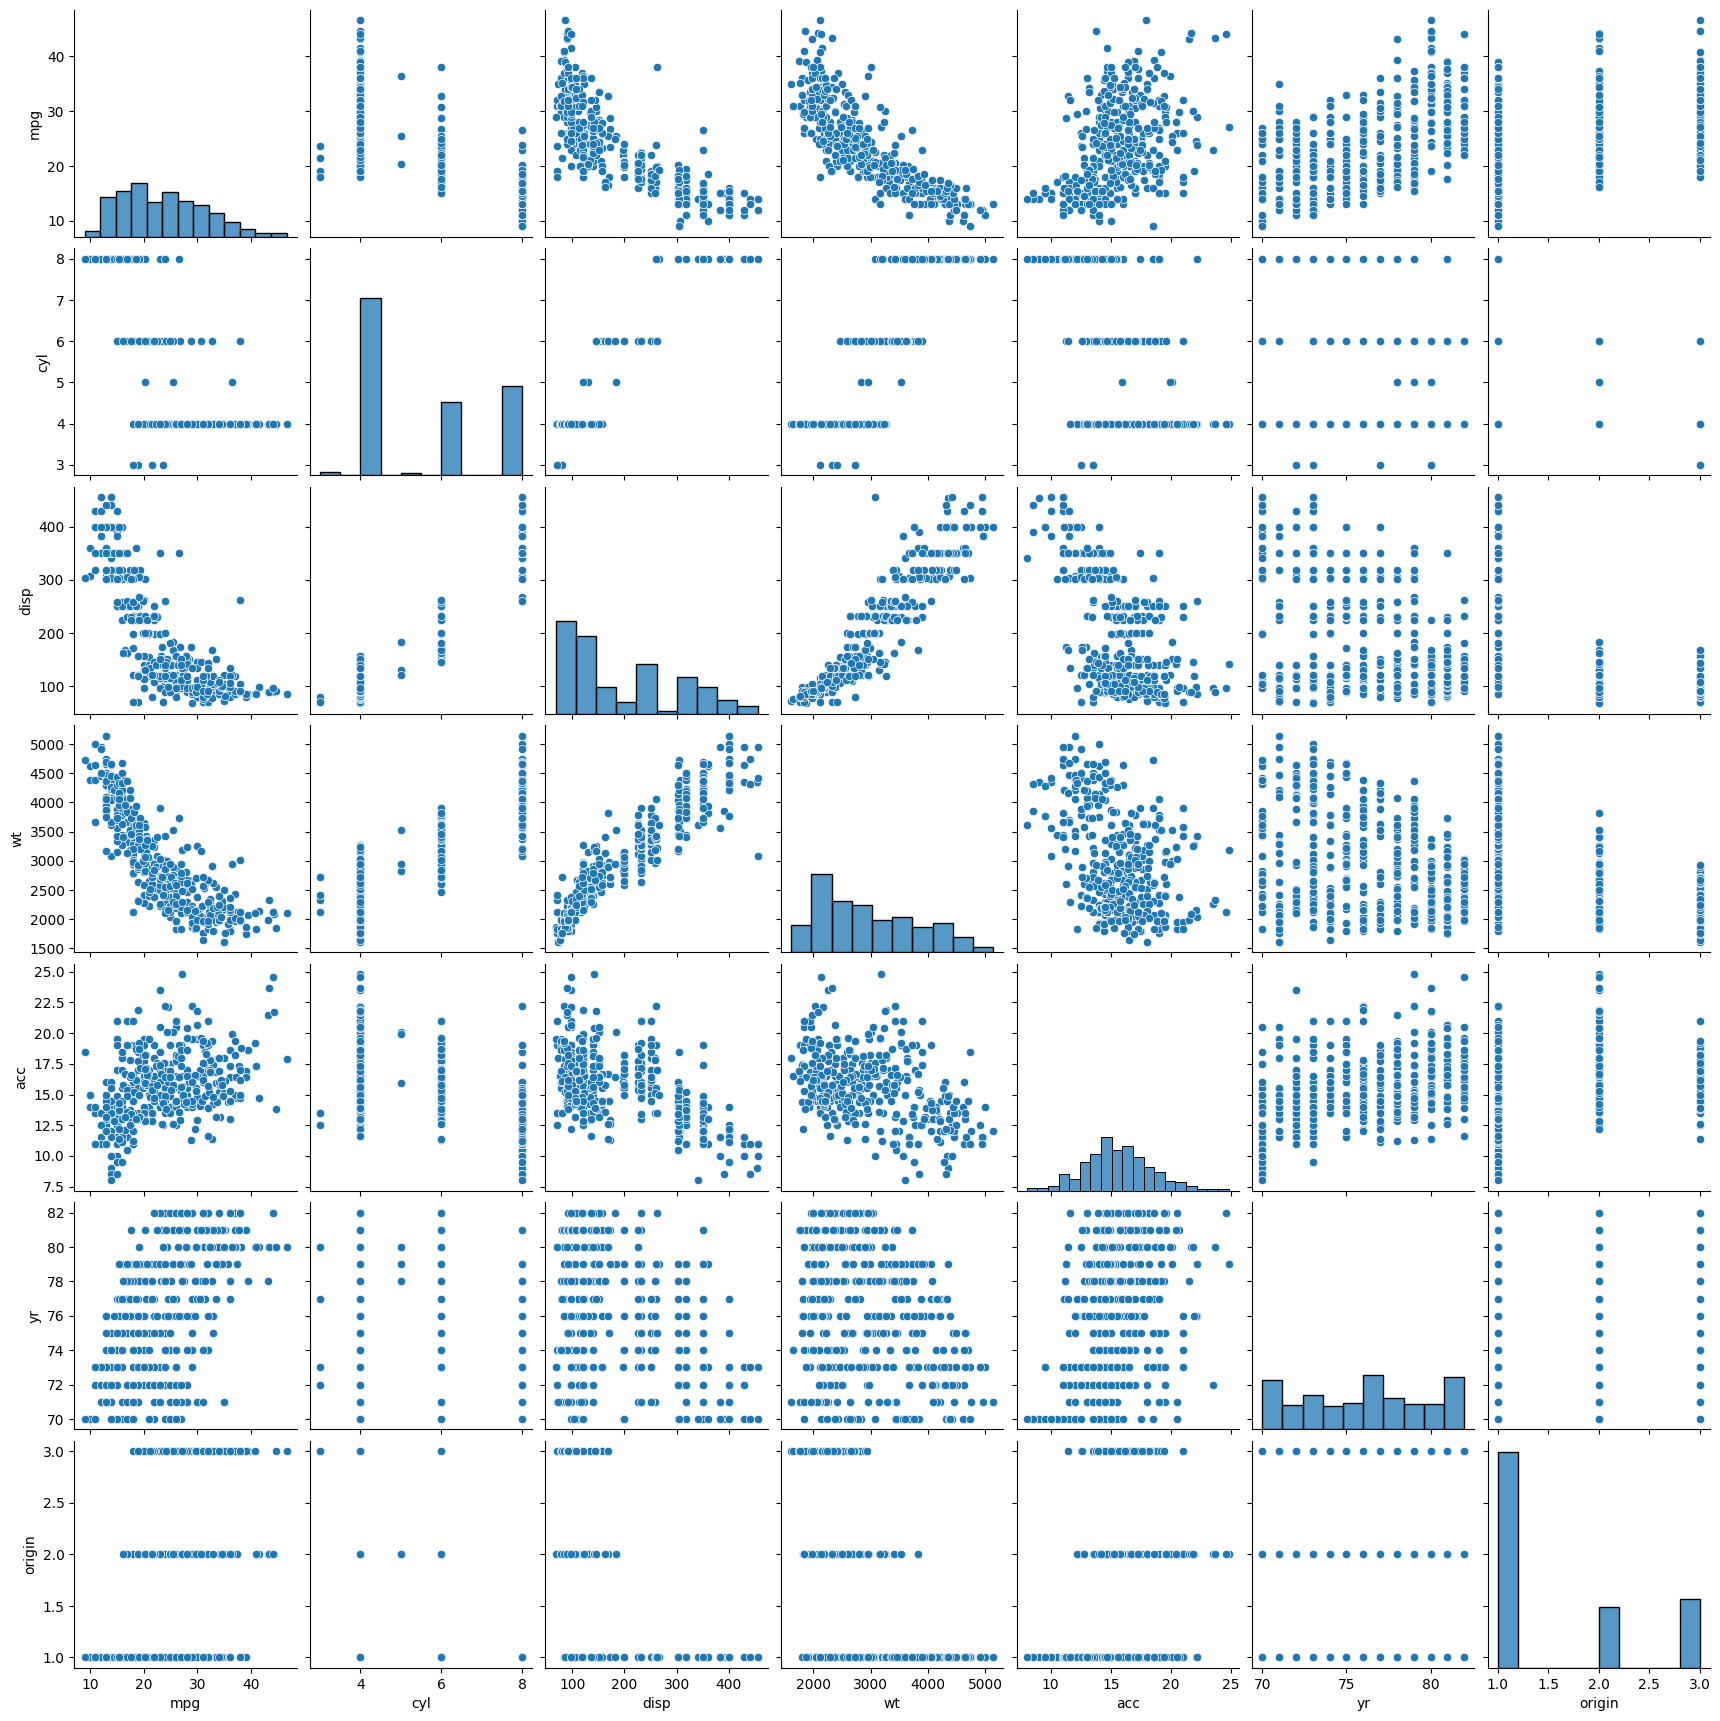

In [11]:
sns.pairplot(data)

<hr>
<li> Displacement & Car Weight have a strong negative correlation with Miles per Gallon
<li> Displacement has a strong positive correlation with Car Weight
<li> Car Weight and Acceleration have no correlation or at best a weak negative correlation
<li> Miles per Gallon and Acceleration have a weak positive correlation
<hr>

<Axes: xlabel='wt', ylabel='disp'>

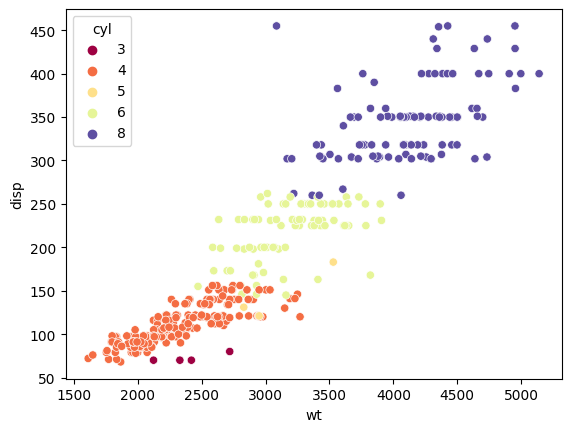

In [12]:
sns.scatterplot(x=data['wt'], y=data['disp'], hue=data['cyl'], palette='Spectral')

<hr>

> **Insights for Q2.d**
> <li> Car Weight and Displacement have a positive correlation
> <li> Displacement increases with number of cylinders & there is a clear cluster created by number of cylinders. For e.g., any car with 8 cylinders has more than 250 displacement and cars with 4 cylinders have a max displacement of 150
> <li> There are very few cars with 5 cylinders or 3 cylinders ( odd number of cylinders )

<hr>

<Axes: xlabel='wt', ylabel='mpg'>

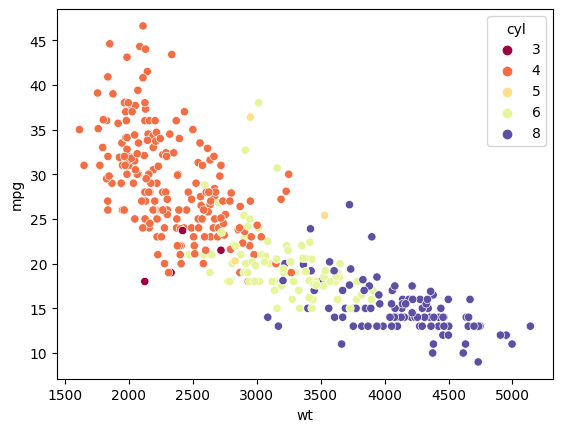

In [13]:
sns.scatterplot(x=data['wt'], y=data['mpg'], hue=data['cyl'], palette='Spectral')

<hr>

> **Insights for Q2.f**
> <li> Miles per Gallon and Car Weight have a strong negative correlation
> <li> Cars with more cylinders have more weight and also have lower miles per gallon
> <li> Cars with 4 and 8 cylinders can be easily differentiated based on their weight ( for e.g., any car with weight more than 3000 is not a 4 cylinder, similarly any car less than 3000 is not a 8 cylinder )
> <li> There are very few 3 or 5 cylinder cards

<hr>

In [14]:
# Column hp has 6 null values which were represented as ? in the dataframe
data = data.replace('?', np.nan)
# check for missing values
print((data.isnull().sum()/data.shape[0])*100,'%')

car_name    0.000000
mpg         0.000000
cyl         0.000000
disp        0.000000
hp          1.507538
wt          0.000000
acc         0.000000
yr          0.000000
origin      0.000000
dtype: float64 %


In [15]:
# Replace null values with the mean for hp
avg = np.mean(data['hp'])
data = data.fillna(avg)

In [16]:
print((data.isnull().sum()/data.shape[0])*100,'%')

car_name    0.0
mpg         0.0
cyl         0.0
disp        0.0
hp          0.0
wt          0.0
acc         0.0
yr          0.0
origin      0.0
dtype: float64 %


<hr>

**Section 3 : Clustering: [15 Marks]**
<li>A. Apply K-Means clustering for 2 to 10 clusters. [3 Marks]
<li>B. Plot a visual and find elbow point. [2 Marks]
<li>C. On the above visual, highlight which are the possible Elbow points. [1 Marks]
<li>D. Train a K-means clustering model once again on the optimal number of clusters. [3 Marks]
<li>E. Add a new feature in the DataFrame which will have labels based upon cluster value. [2 Marks]
<li>F. Plot a visual and color the datapoints based upon clusters. [2 Marks]
<li>G. Pass a new DataPoint and predict which cluster it belongs to. [2 Marks]

<hr>

In [17]:
ctdata = data.iloc[:,1:]
ctdatascl = ctdata.apply(zscore)


> **Apply K-Means clustering for 2 to 10 clusters and plot a visual to find elbow point**


Text(6, 1000, 'elbow point 2')

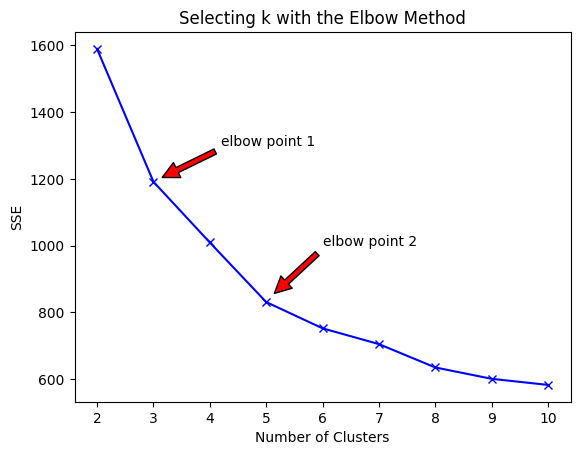

In [18]:
cost_fn = []
sil_coeffs = []

for k in range(2,11):
  model = KMeans(n_clusters=k, n_init='auto', random_state=1)
  model.fit(ctdatascl)
  cost_fn.append(model.inertia_)
  score = silhouette_score(ctdatascl, model.labels_)
  sil_coeffs.append(score)

plt.plot(range(2,11), cost_fn, 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.title('Selecting k with the Elbow Method')

# Annotate the plot to show elbow points
plt.annotate('elbow point 1', xy=(3.1,1200), xytext = (4.2,1300), arrowprops=dict(facecolor='red', shrink=0.05) )
plt.annotate('elbow point 2', xy=(5.1,850), xytext = (6,1000), arrowprops=dict(facecolor='red', shrink=0.05) )

<hr>
<li>Although, there is no clear elbow, we should evaluate K=3 & K=5
<li>Let's try plotting the Silhouette score graph
<hr>

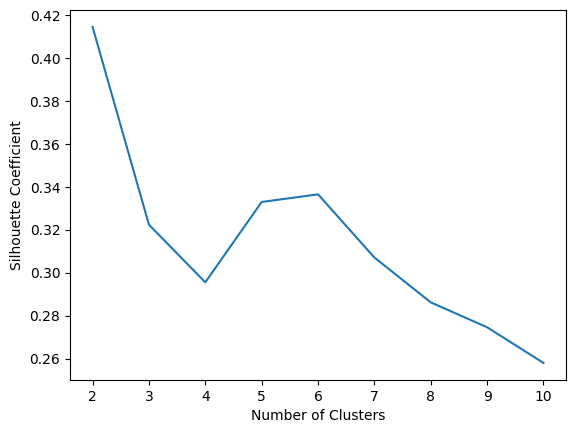

In [19]:
plt.plot(range(2, 11), sil_coeffs)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

<hr>
<li> Silhouette score plot also does not show a clear number of clusters
<hr>

<hr>
<li> Run the KMeans model for K=3 ( first elbow point )
<li> Plot the clusters using a box plot
<hr>

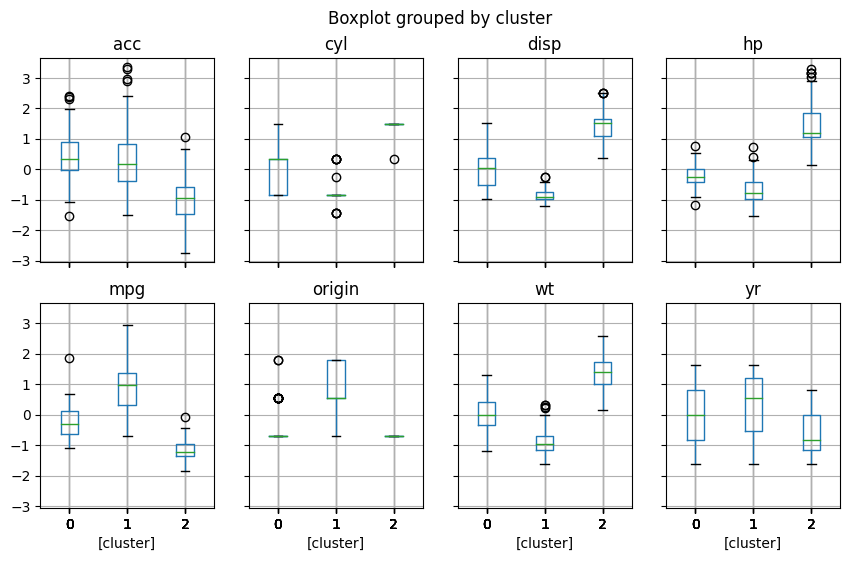

In [20]:
opt_model_k3 = KMeans(3, n_init='auto', random_state=1)
opt_model_k3.fit(ctdatascl)
lbl_k3 = opt_model_k3.predict(ctdatascl)
optk3_df = ctdatascl.copy()
optk3_df["cluster"] = lbl_k3
optk3_df["car_name"] = data["car_name"].copy()
optk3_df.boxplot(by='cluster', layout = (2,4),figsize=(10,6));

<hr>
<li> Run the KMeans model for K=5 ( first elbow point )
<li> Plot the clusters using a box plot
<hr>

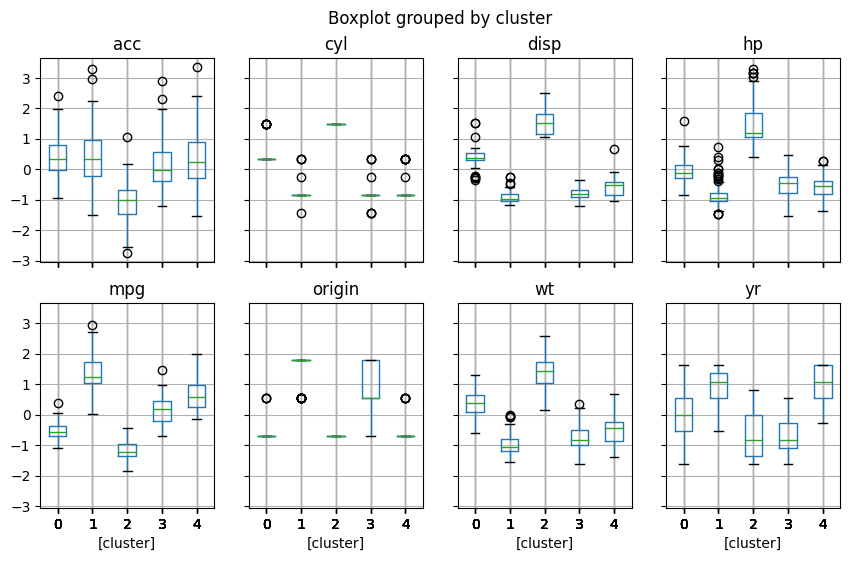

In [21]:
opt_model_k5 = KMeans(5, n_init='auto', random_state=1)
opt_model_k5.fit(ctdatascl)
lbl_k5 = opt_model_k5.predict(ctdatascl)
optk5_df = ctdatascl.copy()
optk5_df["cluster"] = lbl_k5
optk5_df["car_name"] = data["car_name"].copy()
optk5_df.boxplot(by='cluster', layout = (2,4),figsize=(10,6));

<hr>
<li> With 3 clusters, the box plots show very few outliners, however for 5 clusters we see many outliers
<li> This indicates that the optimal number of clusters for this data is 3
<hr>

Text(0, 0.5, 'Miles Per Gallon')

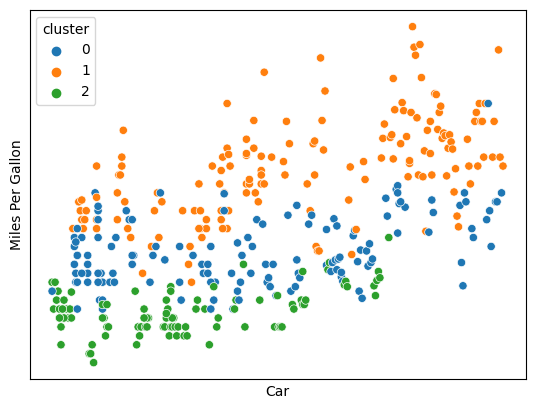

In [22]:
sns.scatterplot(data=optk3_df, x=optk3_df['car_name'], y=optk3_df['mpg'], hue=optk3_df['cluster'], palette='tab10')
plt.xticks([])
plt.yticks([])
plt.xlabel('Car')
plt.ylabel('Miles Per Gallon')

Text(0, 0.5, 'Miles Per Gallon')

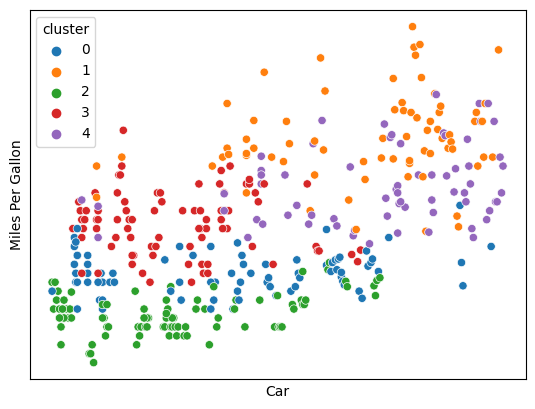

In [23]:
sns.scatterplot(data=optk5_df, x=optk5_df['car_name'], y=optk5_df['mpg'], hue=optk5_df['cluster'], palette='tab10')
plt.xticks([])
plt.yticks([])
plt.xlabel('Car')
plt.ylabel('Miles Per Gallon')

<hr>
<li> Pass a new datapoint to the model & predict which cluster it belongs to
<hr>

In [24]:
new_car = {"car_name":'Tesla A900', "mpg": 25,"cyl": 4,"disp": 113,"hp": 95,"wt": 2228,"acc": 14,"yr": 71,"origin": 3 }
nc = pd.DataFrame(new_car, index=[0])
label = opt_model_k3.predict(nc.iloc[:,1:])
print('The new car belongs to cluster :', label)

The new car belongs to cluster : [2]


## **Great Learning / Deakin (MDS) Project Submission : Part B**
>**Unsupervised Learning Project : Part B**<br>
>*Goal : Demonstrate the ability to cluster and segregate data using Unsupervised Learning*<br>
>*Domain : Automobile Industry* <br>
>*Developer : Nishant Killedar*
<hr>

> **CONTEXT**: The purpose is to classify a given silhouette as one of three types of vehicle, using a set of features extracted from the silhouette. The vehicle may be viewed from one of many different angles <br>
> **DATA DESCRIPTION**: The data contains features extracted from the silhouette of vehicles in different angles. Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.<br>
> **PROJECT OBJECTIVE**: Apply dimensionality reduction technique – PCA and train a model and compare relative results.

<hr>

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from scipy.stats import zscore
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn import metrics
from matplotlib.ticker import ScalarFormatter

<hr>

**Section 1 : Data Understanding & Cleansing: [5 Marks]**
<li>A. Read ‘vehicle.csv’ and save as DataFrame. [1 Marks]
<li>B. Check percentage of missing values and impute with correct approach. [1 Marks]
<li>C. Visualize a Pie-chart and print percentage of values for variable ‘class’. [2 Marks]
<li>D. Check for duplicate rows in the data and impute with correct approach. [1 Marks]

<hr>

In [26]:
vehicle = pd.read_csv('/content/drive/MyDrive/datasets/usl/vehicle.csv')

In [27]:
vehicle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

In [28]:
vehicle.isnull().sum() / vehicle.shape[0] * 100

compactness                    0.000000
circularity                    0.591017
distance_circularity           0.472813
radius_ratio                   0.709220
pr.axis_aspect_ratio           0.236407
max.length_aspect_ratio        0.000000
scatter_ratio                  0.118203
elongatedness                  0.118203
pr.axis_rectangularity         0.354610
max.length_rectangularity      0.000000
scaled_variance                0.354610
scaled_variance.1              0.236407
scaled_radius_of_gyration      0.236407
scaled_radius_of_gyration.1    0.472813
skewness_about                 0.709220
skewness_about.1               0.118203
skewness_about.2               0.118203
hollows_ratio                  0.000000
class                          0.000000
dtype: float64

In [29]:
vehicle.describe().T

,count,mean,std,min,25%,50%,75%,max
compactness,846.0,93.678487,8.234474,73.0,87.00,93.0,100.0,119.0
circularity,841.0,44.828775,6.152172,33.0,40.00,44.0,49.0,59.0
distance_circularity,842.0,82.110451,15.778292,40.0,70.00,80.0,98.0,112.0
radius_ratio,840.0,168.888095,33.520198,104.0,141.00,167.0,195.0,333.0
pr.axis_aspect_ratio,844.0,61.678910,7.891463,47.0,57.00,61.0,65.0,138.0
max.length_aspect_ratio,846.0,8.567376,4.601217,2.0,7.00,8.0,10.0,55.0
scatter_ratio,845.0,168.901775,33.214848,112.0,147.00,157.0,198.0,265.0
elongatedness,845.0,40.933728,7.816186,26.0,33.00,43.0,46.0,61.0
pr.axis_rectangularity,843.0,20.582444,2.592933,17.0,19.00,20.0,23.0,29.0
max.length_rectangularity,846.0,147.998818,14.515652,118.0,137.00,146.0,159.0,188.0


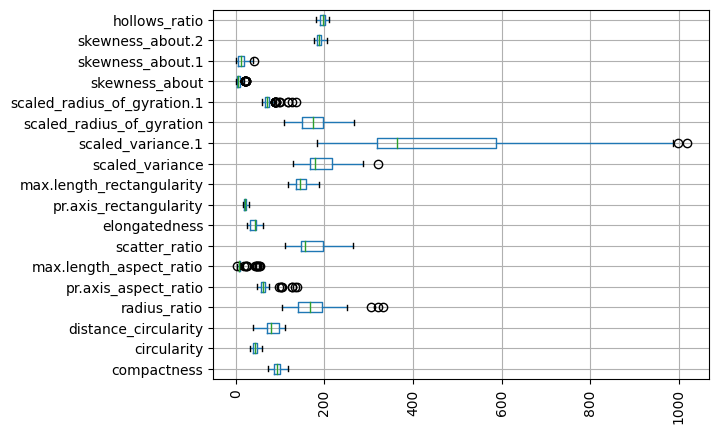

In [30]:
vehicle.boxplot(vert=False)
plt.xticks(rotation=90);

<hr>
<li> We have very few null values ( less than 1% for all features )
<li> Most features do not have many outliers
<li> We can use mean as the method to impute all values
<hr>

In [31]:
for i in vehicle.columns[vehicle.isnull().any(axis=0)]:     #---Applying Only on variables with NaN values
    vehicle[i].fillna(vehicle[i].mean(),inplace=True)

In [32]:
vehicle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  846 non-null    float64
 2   distance_circularity         846 non-null    float64
 3   radius_ratio                 846 non-null    float64
 4   pr.axis_aspect_ratio         846 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                846 non-null    float64
 7   elongatedness                846 non-null    float64
 8   pr.axis_rectangularity       846 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              846 non-null    float64
 11  scaled_variance.1            846 non-null    float64
 12  scaled_radius_of_gyration    846 non-null    float64
 13  scaled_radius_of_gyr

<hr>
<li> We have very few null values ( less than 1% for all features )
<li> Most features do not have many outliers
<li> We can use mean as the method to impute all values
<hr>

In [33]:
pie_class = vehicle['class'].value_counts(normalize=True).reset_index()

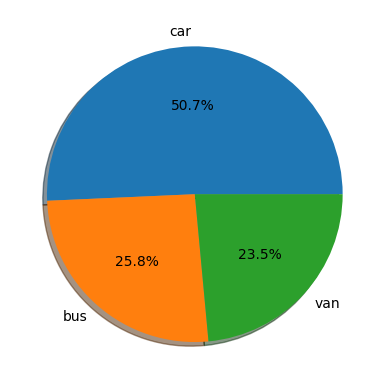

In [34]:
plt.pie(pie_class['class'], labels=pie_class['index'], autopct='%.1f%%', shadow=True);

<hr>

**Section 2 : Data Preparation [2 Marks]**
<li>A. Split data into X and Y. [Train and Test optional] [1 Marks]
<li>B. Standardize the Data. [1 Marks]

<hr>

In [35]:
x = vehicle.iloc[:,:-1]
y = vehicle.iloc[:,-1]

In [36]:
xstd = x.apply(zscore)
ystd = y.replace({'car':0, 'bus':1, 'van':2})

In [37]:
xstd.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,0.160580,0.517302,0.056545,0.272965,1.310206,0.311542,-0.208038,0.136580,-0.225160,0.758332,-0.403077,-0.343028,0.285618,-0.327938,-0.074340,0.380665,-0.312193,0.183957
1,-0.325470,-0.624564,0.120112,-0.835442,-0.593962,0.094079,-0.599893,0.520853,-0.611739,-0.344578,-0.594546,-0.620879,-0.513719,-0.059987,0.537873,0.156589,0.013088,0.452977
2,1.254193,0.843549,1.518571,1.201630,0.548539,0.311542,1.148382,-1.144331,0.934576,0.689401,1.096764,1.108603,1.392391,0.073989,1.558230,-0.403603,-0.149552,0.049447
3,-0.082445,-0.624564,-0.007021,-0.296217,0.167705,0.094079,-0.750606,0.648945,-0.611739,-0.344578,-0.913661,-0.739958,-1.466773,-1.265769,-0.074340,-0.291565,1.639494,1.529056
4,-1.054545,-0.135193,-0.769817,1.081803,5.245485,9.444962,-0.599893,0.520853,-0.611739,-0.275646,1.671171,-0.649231,0.408593,7.308682,0.537873,-0.179527,-1.450677,-1.699181


In [38]:
ystd.head()

0    2
1    2
2    0
3    2
4    1
Name: class, dtype: int64

<hr>

**Section 3 : Model Building: [13 Marks]**
<li>A. Train a base Classification model using SVM. [1 Marks]
<li>B. Print Classification metrics for train data. [1 Marks]
<li>C. Apply PCA on the data with 10 components. [3 Marks]
<li>D. Visualize Cumulative Variance Explained with Number of Components. [2 Marks]
<li>E. Draw a horizontal line on the above plot to highlight the threshold of 90%. [1 Marks]
<li>F. Apply PCA on the data. This time Select Minimum Components with 90% or above variance explained. [2 Marks]
<li>G. Train SVM model on components selected from above step. [1 Marks]
<li>H. Print Classification metrics for train data of above model and share insights. [2 Marks]

<hr>

In [39]:
x_train, x_test, y_train, y_test = train_test_split(xstd,ystd,train_size=0.8,random_state=42)

In [40]:
clf = svm.SVC()
clf.fit(x_train,y_train)

SVC()

In [41]:
y_pred_base = clf.predict(x_test)
y_pred_trn_base = clf.predict(x_train)
print('Test Data Metrics')
print(metrics.classification_report(y_test, y_pred_base))
print('Train Data Metrics')
print(metrics.classification_report(y_train, y_pred_trn_base))

Test Data Metrics
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        78
           1       1.00      0.96      0.98        52
           2       0.93      0.97      0.95        40

    accuracy                           0.97       170
   macro avg       0.97      0.97      0.97       170
weighted avg       0.97      0.97      0.97       170

Train Data Metrics
              precision    recall  f1-score   support

           0       1.00      0.97      0.99       351
           1       0.98      0.98      0.98       166
           2       0.93      0.99      0.96       159

    accuracy                           0.98       676
   macro avg       0.97      0.98      0.97       676
weighted avg       0.98      0.98      0.98       676



<hr>
<li> Apply PCA on the data with 10 components
<hr>

In [42]:
pca = PCA(n_components=10)
pca.fit_transform(xstd)

array([[ 3.32393198e-01, -2.18638382e-01,  1.00128619e+00, ...,
        -3.83358279e-01, -8.68964207e-01,  8.85994765e-02],
       [-1.59374091e+00, -4.20549398e-01, -3.69264301e-01, ...,
         2.47624062e-01,  1.46541766e-01, -9.61040796e-02],
       [ 3.76753509e+00,  1.95040767e-01,  8.82372311e-02, ...,
         4.83438500e-01, -3.08888459e-01, -4.69879602e-01],
       ...,
       [ 4.80780979e+00, -1.82373823e-03,  5.32772800e-01, ...,
         1.10917677e-01, -6.52653571e-01,  5.54811205e-01],
       [-3.29572788e+00, -1.00880341e+00, -3.57467658e-01, ...,
         3.19508398e-01, -2.01552424e-01, -8.75978153e-01],
       [-4.76673461e+00,  3.34686477e-01, -5.68739264e-01, ...,
        -2.48355712e-01, -4.31741589e-01, -3.02292784e-01]])

In [43]:
cum_exp_variance = np.cumsum(pca.explained_variance_ratio_)
print("Cumulative Variance Explained", cum_exp_variance)

Cumulative Variance Explained [0.52206485 0.68942539 0.79504921 0.86054241 0.9114363  0.94136087
 0.96125769 0.97355767 0.98243806 0.98752726]


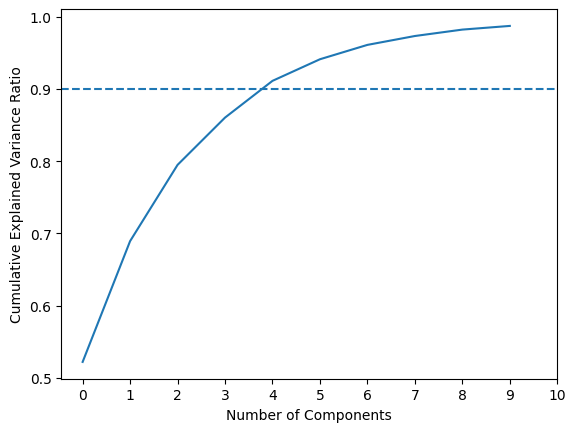

In [44]:
fig, ax = plt.subplots()
ax.plot(cum_exp_variance)
x_ticks = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
plt.xticks(x_ticks, x_ticks)
plt.ylabel('Cumulative Explained Variance Ratio')
plt.xlabel('Number of Components')
ax.axhline(y=0.9, linestyle='--')

In [45]:
# generating the covariance matrix and the eigen values for the PCA analysis
cov_matrix = np.cov(xstd.T)
#generating the eigen values and the eigen vectors
e_vals, e_vecs = np.linalg.eig(cov_matrix)

In [46]:
# the "cumulative variance explained" analysis
tot = sum(e_vals)
var_exp = [( i /tot ) * 100 for i in sorted(e_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 52.20648509  68.94253893  79.50492134  86.05424114  91.14362968
  94.13608733  96.12576859  97.35576702  98.24380605  98.75272648
  99.12215143  99.377159    99.57360642  99.72181774  99.83484544
  99.93162764  99.98286462 100.        ]


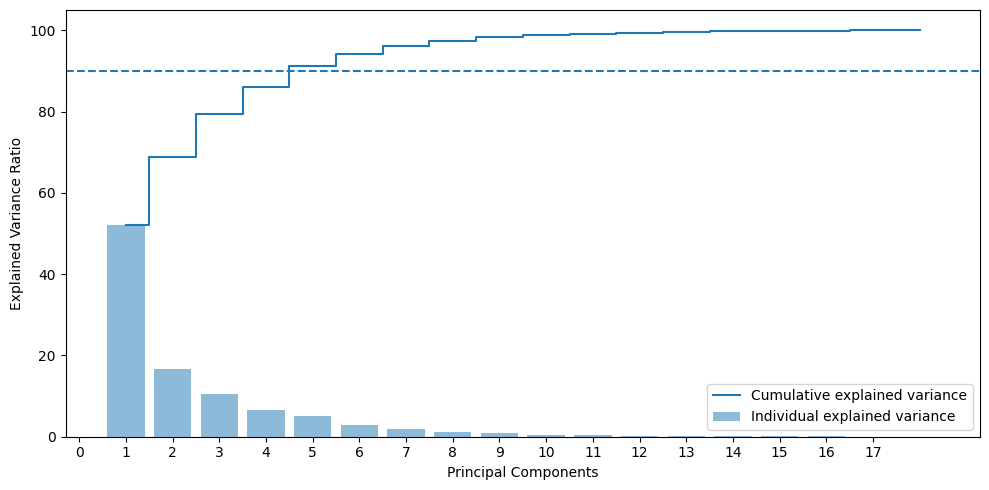

In [47]:
# Plotting the variance explained by the principal components and the cumulative variance explained.
plt.figure(figsize=(10 , 5))
plt.bar(range(1, e_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, e_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.axhline(y=90, linestyle='--')
x_ticks = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]
plt.xticks(x_ticks, x_ticks)
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

<hr>
<li> Based on the above plots & the Cumulative Variance Explained array, we can see that minimum number of components for 90% accuracy is 5.
<li> Next step is to run PCA with 5 components
<hr>

In [48]:
pca5 = PCA(n_components=5)
xnew = pca5.fit_transform(xstd)
print(xnew.shape)

(846, 5)


In [49]:
x_trnpc5, x_tstpc5, y_train, y_test = train_test_split(xnew,ystd,train_size=0.8,random_state=42)

In [50]:
clf_n5 = svm.SVC()
clf_n5.fit(x_trnpc5,y_train)

SVC()

In [51]:
y_pred_n5 = clf_n5.predict(x_tstpc5)
y_pred_trn_n5 = clf_n5.predict(x_trnpc5)
print('Test Data Metrics')
print(metrics.classification_report(y_test, y_pred_n5))
print('Train Data Metrics')
print(metrics.classification_report(y_train, y_pred_trn_n5))

Test Data Metrics
              precision    recall  f1-score   support

           0       0.78      0.82      0.80        78
           1       0.80      0.63      0.71        52
           2       0.55      0.65      0.60        40

    accuracy                           0.72       170
   macro avg       0.71      0.70      0.70       170
weighted avg       0.73      0.72      0.72       170

Train Data Metrics
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       351
           1       0.85      0.70      0.77       166
           2       0.70      0.76      0.73       159

    accuracy                           0.81       676
   macro avg       0.80      0.78      0.79       676
weighted avg       0.81      0.81      0.81       676



<hr>

**Section 4 : Performance Improvement: [5 Marks]**
<li>A. Train another SVM on the components out of PCA. Tune the parameters to improve performance. [2 Marks]
<li>B. Share best Parameters observed from above step. [1 Marks]
<li>C. Print Classification metrics for train data of above model and share relative improvement in performance in all the models along with insights. [2 Marks]

<hr>

In [52]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001],'kernel': ['rbf']}
grid = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 3)
grid.fit(x_trnpc5,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.551 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.541 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.570 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.563 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.563 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.735 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.637 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.667 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.659 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.667 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.515 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [53]:
print('Best parameters observed from GridSearch :', grid.best_params_)
print('Best estimator ', grid.best_estimator_)

Best parameters observed from GridSearch : {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Best estimator  SVC(C=10, gamma=0.1)


In [54]:
clf_best = grid.best_estimator_

In [55]:
y_pred_best = clf_best.predict(x_tstpc5)
y_pred_trn_best = clf_best.predict(x_trnpc5)
print('Test Data Metrics')
print(metrics.classification_report(y_test, y_pred_best))
print('Train Data Metrics')
print(metrics.classification_report(y_train, y_pred_trn_best))

Test Data Metrics
              precision    recall  f1-score   support

           0       0.80      0.88      0.84        78
           1       0.83      0.75      0.79        52
           2       0.73      0.68      0.70        40

    accuracy                           0.79       170
   macro avg       0.79      0.77      0.78       170
weighted avg       0.79      0.79      0.79       170

Train Data Metrics
              precision    recall  f1-score   support

           0       0.92      0.93      0.93       351
           1       0.89      0.86      0.88       166
           2       0.84      0.84      0.84       159

    accuracy                           0.89       676
   macro avg       0.88      0.88      0.88       676
weighted avg       0.89      0.89      0.89       676



<hr>
<li> Let's look at the accuracy metrics across all models we created
<br><br>

| SVC Model | Test Accuracy | Train Accuracy |
| --- | --- | --- |
| Before PCA | 97% | 98% |
| After PCA with 5 components | 72% | 78% |
| PCA with parameter tuning | 79% | 89% |
<br>

<li> From the table above, the accuracy of the model decreased after PCA
<li> The reason is we picked up only 5 components that explained 90% of the model.
<li> Components that were not included led to less accuracy in SVM model
<li> After tuning, the performance of the SVM model improved by 7% ( significant improvement )
<hr>

<hr>

**Section 5 : Data Understanding & Cleaning: [5 Marks]**
<li>A. Explain pre-requisite/assumptions of PCA. [2 Marks]
<li>B. Explain advantages and limitations of PCA. [3 Marks]

<hr>

**Pre-requisite / Assumptions of PCA**
<li> PCA assumes linear relationship between attributes. If the relationships are non-linear, then PCA is ineffective
<li> Larger sample sizes are required for PCA to produce a reasonable result, will not provide accurate results with small datasets
<li> Data should not have significant outliers, otherwise PCA is ineffective

**Limitations of PCA**
<li> PCA is sensitive to scale of the data, it is important to normalize all attributes
<li> Interpreting PCA is challenging as it combines features to generate components
<li> PCA is not effective with skewed data or data with many outliers
<li> As we are reducing dimensions with PCA, there will be some information loss



**Advantages of PCA**
<li> Removes correlation (collinearity) between attributes
<li> Helps in reducing overfitting
<li> Can improve visualization, however it reduces interpretability
<li> Better performance as we have less number of dimensions to process